In [1]:
import numpy as np
import pandas as pd
import os 

# Import visualization modules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('df.csv',parse_dates=['Timestamp'], infer_datetime_format=True)
# bt['Timestamp']=pd.to_datetime(df['Timestamp'])

In [3]:
df

,Unnamed: 0,Timestamp,OutboundUtilzation (%)
0,0,2017-10-10 07:01:36,96.2442
1,1,2017-10-10 07:21:36,99.1131
2,2,2017-10-10 07:26:36,97.2892
3,3,2017-10-10 07:31:36,98.0286
4,4,2017-10-10 07:36:36,99.5263
...,...,...,...
46321,20690,2018-03-25 23:43:03,65.8425
46322,20691,2018-03-25 23:48:03,56.8811
46323,20692,2018-03-25 23:53:03,43.6352
46324,20693,2018-03-25 23:58:03,48.9415


In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df

,Timestamp,OutboundUtilzation (%)
0,2017-10-10 07:01:36,96.2442
1,2017-10-10 07:21:36,99.1131
2,2017-10-10 07:26:36,97.2892
3,2017-10-10 07:31:36,98.0286
4,2017-10-10 07:36:36,99.5263
...,...,...
46321,2018-03-25 23:43:03,65.8425
46322,2018-03-25 23:48:03,56.8811
46323,2018-03-25 23:53:03,43.6352
46324,2018-03-25 23:58:03,48.9415


In [6]:
df.set_index('Timestamp',inplace=True)

In [7]:
df

,OutboundUtilzation (%)
Timestamp,
2017-10-10 07:01:36,96.2442
2017-10-10 07:21:36,99.1131
2017-10-10 07:26:36,97.2892
2017-10-10 07:31:36,98.0286
2017-10-10 07:36:36,99.5263
...,...
2018-03-25 23:43:03,65.8425
2018-03-25 23:48:03,56.8811
2018-03-25 23:53:03,43.6352


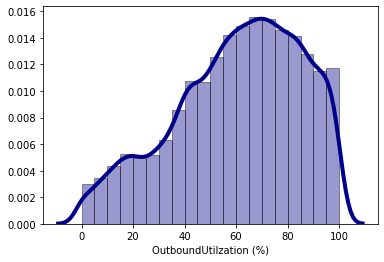

In [11]:
sns.distplot(bt['OutboundUtilzation (%)'], hist=True, kde=True, bins=int(100/5),color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

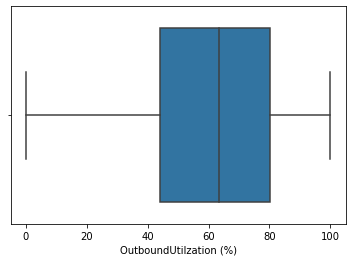

In [12]:
sns.boxplot(x=bt["OutboundUtilzation (%)"])

In [12]:
# most of the datas falls in between 40% to 80%

### Group the data by hour 

In [29]:
df_res = df.resample("H").mean()

# bt1 = bt.reset_index()
# bt1.groupby(pd.Grouper(key='Timestamp', freq="1H")).mean()

In [9]:
df_res

,OutboundUtilzation (%)
Timestamp,
2017-10-10 07:00:00,90.397000
2017-10-10 08:00:00,74.493000
2017-10-10 09:00:00,68.930125
2017-10-10 10:00:00,52.874208
2017-10-10 11:00:00,58.498275
...,...
2018-03-25 20:00:00,30.050225
2018-03-25 21:00:00,11.864578
2018-03-25 22:00:00,24.694371


In [31]:
df_res = df_res.interpolate(limit=1)

In [34]:
mean = df.mean()

In [35]:
mean

OutboundUtilzation (%)    60.659431
dtype: float64

In [36]:
df_res = df_res.fillna(value=mean)

In [37]:
df_res.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4002 entries, 2017-10-10 07:00:00 to 2018-03-26 00:00:00
Freq: H
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OutboundUtilzation (%)  4002 non-null   float64
dtypes: float64(1)
memory usage: 62.5 KB


# Stationarity Test

In [40]:
#STATIONARITY CHECK

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = pd.Series(timeseries).rolling(window=24).mean()
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = pd.Series(timeseries).rolling(window=24).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

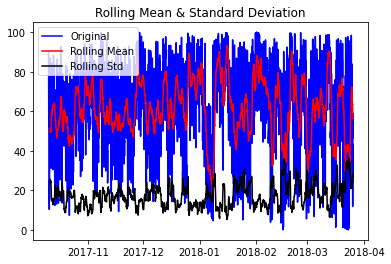

Results of Dickey-Fuller Test:
Test Statistic                -6.965790e+00
p-value                        8.922486e-10
#Lags Used                     3.100000e+01
Number of Observations Used    3.970000e+03
Critical Value (1%)           -3.431998e+00
Critical Value (5%)           -2.862268e+00
Critical Value (10%)          -2.567158e+00
dtype: float64


In [41]:
test_stationarity(df_res['OutboundUtilzation (%)'])

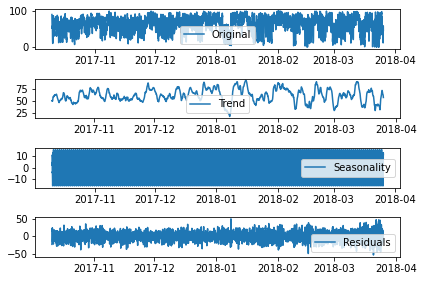

In [43]:
#DECOMPOSITION
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_res)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_res, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# bt1_decompose = residual
# bt1_decompose.dropna(inplace=True)
# test_stationarity(bt1_decompose)

In [44]:
from statsmodels.tsa.arima_model import ARIMA

In [46]:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(df_res, nlags=30)
lag_pacf = pacf(df_res, nlags=30, method='ols')

C:\Users\accelerate\anaconda4\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'Autocorrelation Function')

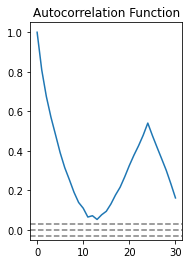

In [48]:
#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_res)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_res)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

Text(0.5, 1.0, 'Autocorrelation Function')

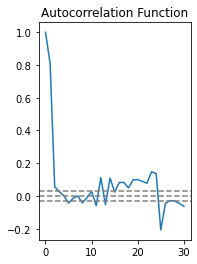

In [49]:
#Plot PACF:    
plt.subplot(121)    
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_res)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_res)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

In [50]:
df_res_values=df_res.values

X = df_res_values
#size = int(len(X) * 0.667)
#train, test = X[0:size], X[size:len(X)]

In [51]:
size = int(len(X) * 0.667)

In [59]:
X

array([[90.397     ],
       [74.493     ],
       [68.930125  ],
       ...,
       [24.69437083],
       [59.08051667],
       [46.5513    ]])

In [53]:
#AR Model
#training will be 66%, test will be 33% as per our model
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from numpy.linalg import LinAlgError
import warnings
warnings.filterwarnings("ignore")

In [68]:
history = [x for x in X]
predictions = list()
#test.reset_index()
for t in range(168):
    try:
        model = ARIMA(history, order=(24,1,2))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        #obs = test[t]
        history.append(yhat)
    except (ValueError, LinAlgError):
        pass
    print('predicted=%f' % (yhat))
#error = mean_squared_error(test, predictions)
#rmse = mean_squared_error(test, predictions)**0.5
#print('Test MSE: %.3f' % rmse)


#from math import sqrt
#rms = sqrt(mean_squared_error(test, predictions))

predicted=54.749673
predicted=60.840465
predicted=66.326468
predicted=66.408926
predicted=62.802944
predicted=58.829802
predicted=63.653361
predicted=63.696479
predicted=62.751722
predicted=54.797169
predicted=56.217423
predicted=42.175394
predicted=41.422481
predicted=39.425668
predicted=36.793503
predicted=32.946323
predicted=30.065707
predicted=30.600793
predicted=36.835342
predicted=33.965114
predicted=30.349574
predicted=34.365899
predicted=47.144965
predicted=46.118159
predicted=51.551084
predicted=54.891599
predicted=58.299386
predicted=59.431781
predicted=58.862640
predicted=57.575093
predicted=58.393028
predicted=57.654898
predicted=56.404287
predicted=52.429273
predicted=51.814084
predicted=45.391521
predicted=43.529436
predicted=40.775716
predicted=39.140965
predicted=37.224151
predicted=35.465206
predicted=35.462712
predicted=37.686831
predicted=37.599254
predicted=37.640226
predicted=39.575546
predicted=44.983447
predicted=46.204334
predicted=49.664912
predicted=51.849357


In [72]:
predictions

[array([54.74967277]),
 array([60.84046467]),
 array([66.32646768]),
 array([66.40892594]),
 array([62.80294384]),
 array([58.82980241]),
 array([63.6533611]),
 array([63.69647877]),
 array([62.75172208]),
 array([54.79716869]),
 array([56.21742308]),
 array([42.17539375]),
 array([41.42248091]),
 array([39.42566807]),
 array([36.79350335]),
 array([32.94632257]),
 array([30.06570707]),
 array([30.60079331]),
 array([36.83534229]),
 array([33.96511434]),
 array([30.34957358]),
 array([34.365899]),
 array([47.14496473]),
 array([46.11815903]),
 array([51.5510843]),
 array([54.89159906]),
 array([58.29938647]),
 array([59.43178058]),
 array([58.86264016]),
 array([57.57509291]),
 array([58.39302833]),
 array([57.6548981]),
 array([56.40428686]),
 array([52.42927301]),
 array([51.8140845]),
 array([45.39152134]),
 array([43.52943573]),
 array([40.77571606]),
 array([39.14096479]),
 array([37.22415055]),
 array([35.46520588]),
 array([35.46271241]),
 array([37.6868306]),
 array([37.599254]

In [76]:
len(predictions)

168

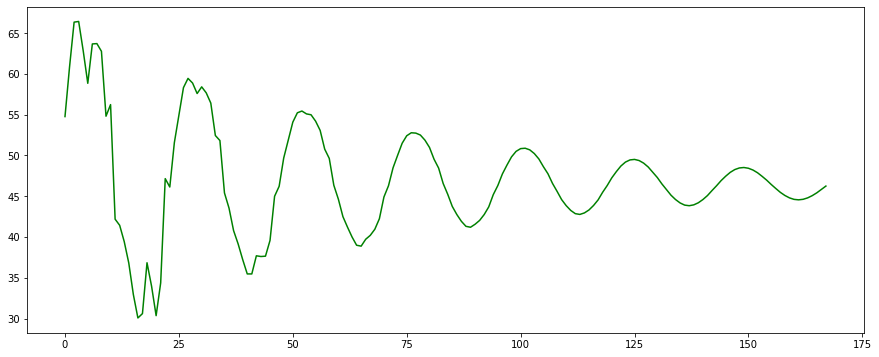

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import pyplot
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

#pyplot.plot(test, color = 'blue', label='test')   
pyplot.plot(predictions, color='green', label='pred')
pyplot.show()

In [1]:
from math import sqrt
rmse = sqrt(mean_squared_error(test, predictions))
print('Mean Squarred Error: %.2f'% rmse)

NameError: name 'mean_squared_error' is not defined

In [46]:
!pip install pmdarima

  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\accelerate\\anaconda4\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [44]:
from pmdarima.arima import auto_arima

arima_model = auto_arima(train, start_p=1, start_q=1, d=1, max_p=4, max_q=4, start_P=1, 
                         D=None, start_Q=1, max_P=4, max_D=1, max_Q=4, max_order=5, m=1, 
                         seasonal=True, stationary=False, information_criterion='aic', 
                         alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, 
                         n_jobs=1, start_params=None, trend=None, method='lbfgs', 
                         maxiter=50, offset_test_args=None, seasonal_test_args=None, 
                         suppress_warnings=True, error_action='trace', trace=False, 
                         random=False, random_state=None, n_fits=10, 
                         return_valid_fits=False, out_of_sample_size=0, 
                         scoring='mse', scoring_args=None, with_intercept='auto', 
                         sarimax_kwargs=None)

arima_model.summary()

ModuleNotFoundError: No module named 'pmdarima'

In [43]:
prediction_arima_model = pd.DataFrame(arima_model.predict(n_periods=len(test)))
prediction_arima_model.columns = ['OutboundUtilzation (%']

np.exp(prediction_arima_model)

NameError: name 'arima_model' is not defined

In [54]:
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.8)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
evaluate_models(train, [0,1,2,3], [1], [1,2,3])

ARIMA(0, 1, 1) MSE=203.986
ARIMA(0, 1, 2) MSE=204.988
ARIMA(0, 1, 3) MSE=208.427
ARIMA(1, 1, 1) MSE=199.289
ARIMA(1, 1, 2) MSE=197.766
ARIMA(1, 1, 3) MSE=197.888
ARIMA(2, 1, 1) MSE=197.771
ARIMA(2, 1, 2) MSE=198.469
ARIMA(2, 1, 3) MSE=198.239
ARIMA(3, 1, 1) MSE=197.922
